
![alt text](UM6P.png)

***Abderahmane HAMDOUCHI***



**Master SDAD**

**UM6P**

\newpage

## Travail à rendre 

Dans ce travail, vous êtes amenés à analyser le réseau de Game of Thrones en utilisant la bibliothèque Networkx, vous trouver ci-dessous les Datasets des différents livre: 

https://github.com/mathbeveridge/asoiaf/tree/master/data 

Ainsi qu'un simple tutorial de base: 

https://www.kaggle.com/mmmarchetti/game-of-thrones-network-analysis

https://dzone.com/articles/analyzing-relationships-in-game-of-thrones-with-ne-1

Vous avez le choix d'utiliser ce que vous voulez comme algorithmes. Toutefois, vous devez répondre à un ensemble de questions: 

1. le caractère le plus important dans game of thrones 
2. l'evolution d'un caractère au fil des saisons (books)
3. les communautés (est ce qu'elles reflétent les vrais communautés dans la série...)
4. ... vous avez le libre choix d'utiliser d'autres techniques et poser d'autres questions 

![image.png](attachment:image.png)

 nous analyserons le réseau de cooccurrence des personnages dans les livres GOT. Cet ensemble de données constitue un réseau et est donné sous forme de fichier texte décrivant les arêtes entre les caractères, avec quelques attributs attachés à chaque arête. Commençons par charger les données du premier livre A Game of Thrones et inspectons-le.
 

In [1]:
# Importing modules
import pandas as pd

# Reading in datasets/book1.csv
book1 = pd.read_csv('dataset GOT/asoiaf-book1-edges.csv')

# Printing out the head of the dataset
book1.head()

FileNotFoundError: [Errno 2] File dataset GOT/asoiaf-book1-edges.csv does not exist: 'dataset GOT/asoiaf-book1-edges.csv'

In [2]:
book1.shape

(684, 5)

In [3]:
book1['Type'].unique()

array(['Undirected'], dtype=object)

In [4]:
print(book1['Target'].value_counts())

Robert-Baratheon    41
Tyrion-Lannister    41
Sansa-Stark         31
Robb-Stark          22
Jon-Snow            20
                    ..
Wylla                1
Shae                 1
Timett               1
Tregar               1
Raymun-Darry         1
Name: Target, Length: 143, dtype: int64


In [5]:
print(book1['book'].value_counts())

1    684
Name: book, dtype: int64


# nous utiliserons Networkx pour l'analyse de réseau présente ici

In [6]:
# Importing modules
import networkx as nx

# Creating an empty graph object
G_book1 = nx.Graph()

In [7]:
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [8]:
print("Total number of edges: ", int(G_book1.number_of_edges())) 

Total number of edges:  684


In [9]:
print("Total number of nodes: ", int(G_book1.number_of_nodes())) 

Total number of nodes:  187


In [13]:
print("List of all nodes we can go to in a single step from node of Jaime-Lannister	: ", 
                                                 list(G_book1.neighbors('Addam-Marbrand')))

List of all nodes we can go to in a single step from node of Jaime-Lannister	:  ['Jaime-Lannister', 'Tywin-Lannister']


In [14]:
print("List of all nodes we can go to in a single step from node of Jaime-Lannister	: ", 
                                                 list(G_book1.neighbors('Jaime-Lannister')))

List of all nodes we can go to in a single step from node of Jaime-Lannister	:  ['Addam-Marbrand', 'Aerys-II-Targaryen', 'Barristan-Selmy', 'Brynden-Tully', 'Catelyn-Stark', 'Cersei-Lannister', 'Eddard-Stark', 'Edmure-Tully', 'Galbart-Glover', 'Gregor-Clegane', 'Harys-Swyft', 'Joffrey-Baratheon', 'Jon-Arryn', 'Jory-Cassel', 'Kevan-Lannister', 'Loras-Tyrell', 'Lysa-Arryn', 'Petyr-Baelish', 'Renly-Baratheon', 'Rickard-Karstark', 'Robb-Stark', 'Robert-Baratheon', 'Rodrik-Cassel', 'Sandor-Clegane', 'Sansa-Stark', 'Tyrion-Lannister', 'Tywin-Lannister', 'Varys', 'Wyl-(guard)']


# 1. Fruchterman ReinGold Layout

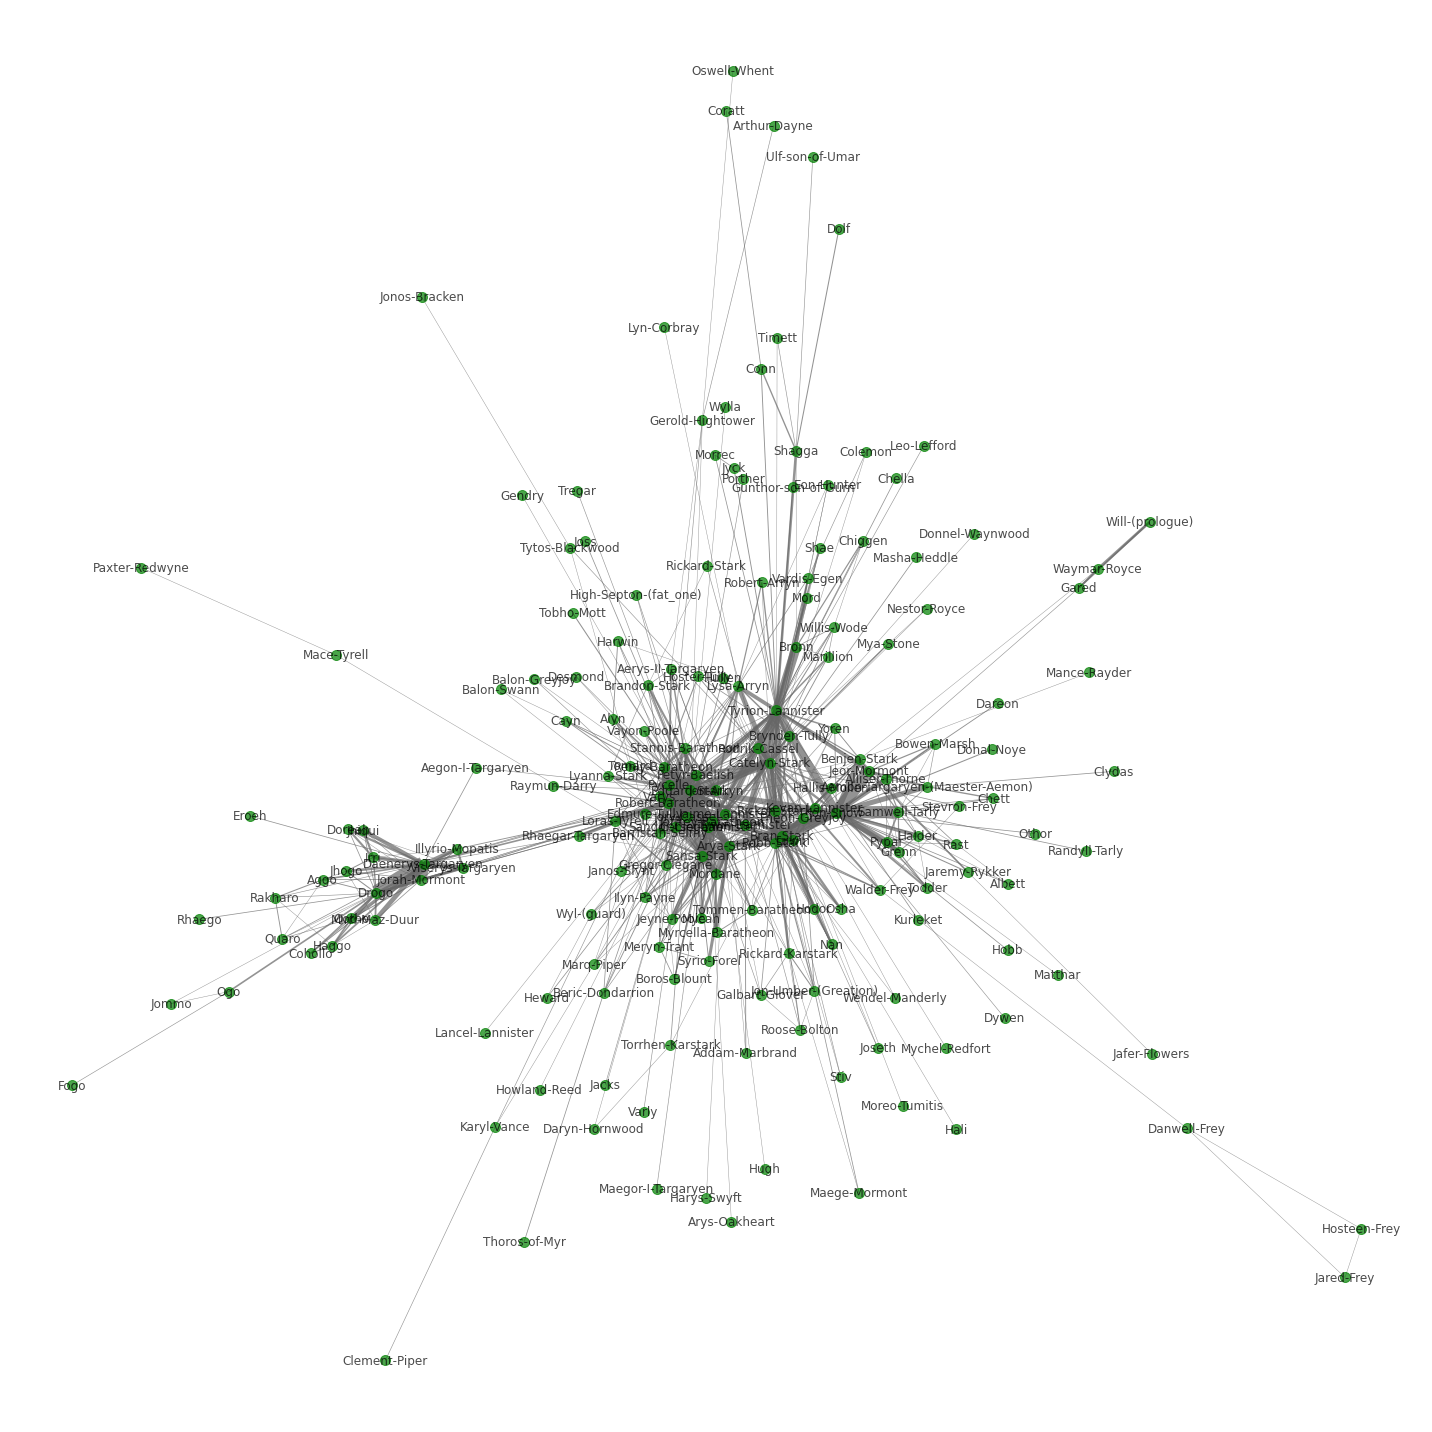

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# fixing the size of the figure 
plt.figure(figsize =(20, 20)) 
pos = nx.fruchterman_reingold_layout(G_book1) 
node_color = [G_book1.degree(v) for v in G_book1] 
# node colour is a list of degrees of nodes 

node_size = 100
# size of node 
edge_width = [0.15 * G_book1[u][v]['weight'] for u, v in G_book1.edges()] 
# width of edge is a list of weight of edges 

nx.draw_networkx(G_book1,pos, node_size = node_size, 
                node_color = 'green', alpha = 0.7, 
                with_labels = True, width = edge_width, 
                edge_color ='.4', cmap = plt.cm.Blues) 

plt.axis('off') 
plt.tight_layout();

# Q1. Le personnage le plus important de chaque livre

## 1. degré de centralité:
    - Ceci est basé sur l'hypothèse que les nœuds importants ont de nombreuses connexions.

In [35]:
# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['dataset GOT/asoiaf-book2-edges.csv', 'dataset GOT/asoiaf-book3-edges.csv', 'dataset GOT/asoiaf-book4-edges.csv', 'dataset GOT/asoiaf-book5-edges.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

In [56]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])


# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:5]


# Printing out the top 10 of book1 and book5
print(sorted_deg_cen_book1)


[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572)]


In [59]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:5]

# Printing out the top 5 of book1 and book5
for i in range(len(sorted_deg_cen_book1)):
    print( sorted_deg_cen_book1[i][0])# Printing out the top 5 of book1

Eddard-Stark
Robert-Baratheon
Tyrion-Lannister
Catelyn-Stark
Jon-Snow


In [58]:
# Calculating the degree centrality of book 2
deg_cen_book2 = nx.degree_centrality(books[1])


# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book2 =  sorted(deg_cen_book2.items(), key=lambda x:x[1], reverse=True)[0:5]


# Printing out the top 5 of book1 and book5
print(sorted_deg_cen_book2)

[('Tyrion-Lannister', 0.2054263565891473), ('Joffrey-Baratheon', 0.1821705426356589), ('Cersei-Lannister', 0.16666666666666666), ('Arya-Stark', 0.15503875968992248), ('Stannis-Baratheon', 0.1434108527131783)]


In [38]:
# Calculating the degree centrality of book 2
deg_cen_book1 = nx.degree_centrality(books[1])

# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:5]

# Printing out the top 10 of book1 and book5
for i in range(len(sorted_deg_cen_book1)):
    print( sorted_deg_cen_book1[i][0])# Printing out the top 5 of book1

Tyrion-Lannister
Joffrey-Baratheon
Cersei-Lannister
Arya-Stark
Stannis-Baratheon


In [60]:
# Calculating the degree centrality of book 3
deg_cen_book3 = nx.degree_centrality(books[2])


# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book3 =  sorted(deg_cen_book3.items(), key=lambda x:x[1], reverse=True)[0:5]


# Printing out the top 5 of book1 and book5
print(sorted_deg_cen_book3)

[('Tyrion-Lannister', 0.19536423841059603), ('Jon-Snow', 0.17218543046357615), ('Joffrey-Baratheon', 0.16556291390728478), ('Robb-Stark', 0.16225165562913907), ('Sansa-Stark', 0.15894039735099338)]


In [39]:
# Calculating the degree centrality of book 3
deg_cen_book1 = nx.degree_centrality(books[2])

# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:5]

# Printing out the top 10 of book1 and book5
for i in range(len(sorted_deg_cen_book1)):
    print( sorted_deg_cen_book1[i][0])# Printing out the top 5 of book1

Tyrion-Lannister
Jon-Snow
Joffrey-Baratheon
Robb-Stark
Sansa-Stark


In [40]:
# Calculating the degree centrality of book 4
deg_cen_book1 = nx.degree_centrality(books[3])

# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:5]

# Printing out the top 10 of book1 and book5
for i in range(len(sorted_deg_cen_book1)):
    print( sorted_deg_cen_book1[i][0])# Printing out the top 5 of book1

Jaime-Lannister
Cersei-Lannister
Brienne-of-Tarth
Tyrion-Lannister
Margaery-Tyrell


In [41]:
# Calculating the degree centrality of book 5
deg_cen_book1 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:5]

# Printing out the top 10 of book1 and book5
for i in range(len(sorted_deg_cen_book1)):
    print( sorted_deg_cen_book1[i][0])# Printing out the top 5 of book1

Jon-Snow
Daenerys-Targaryen
Stannis-Baratheon
Tyrion-Lannister
Theon-Greyjoy


## 2. Centralité de proximité

In [61]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.closeness_centrality(books[0])


# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:5]


# Printing out the top 5 of book1 and book5
print(sorted_deg_cen_book1)

[('Eddard-Stark', 0.5636363636363636), ('Robert-Baratheon', 0.5454545454545454), ('Tyrion-Lannister', 0.510989010989011), ('Catelyn-Stark', 0.5054347826086957), ('Robb-Stark', 0.49732620320855614)]


In [49]:
closeness=nx.closeness_centrality(books[0])
sorted_clo_cen_book1=sorted(closeness.items(), key=lambda item: item[1],reverse=True)[:5]

# Printing out the top 5 of book1 
for i in range(len(sorted_clo_cen_book1)):
    print(sorted_clo_cen_book1[i][0])# Printing out the top 5 of book1
    


Eddard-Stark
Robert-Baratheon
Tyrion-Lannister
Catelyn-Stark
Robb-Stark


In [63]:
# Calculating the degree centrality of book 2
deg_cen_book2 = nx.closeness_centrality(books[1])


# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book2 =  sorted(deg_cen_book2.items(), key=lambda x:x[1], reverse=True)[0:5]


# Printing out the top 5 of book1 and book2
print(sorted_deg_cen_book2)

[('Robb-Stark', 0.4777777777777778), ('Eddard-Stark', 0.4574468085106383), ('Robert-Baratheon', 0.44869565217391305), ('Jaime-Lannister', 0.44714038128249567), ('Tyrion-Lannister', 0.4440619621342513)]


In [50]:
# Calculating the degree centrality of book 2
deg_cen_book2 = nx.closeness_centrality(books[1])

# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book2 =  sorted(deg_cen_book2.items(), key=lambda x:x[1], reverse=True)[0:5]

# Printing out the top 5 of book2
for i in range(len(sorted_deg_cen_book2)):
    print(sorted_deg_cen_book2[i][0])# Printing out the top 5 of book2

Robb-Stark
Eddard-Stark
Robert-Baratheon
Jaime-Lannister
Tyrion-Lannister


In [51]:
# Calculating the degree centrality of book 2
deg_cen_book2 = nx.closeness_centrality(books[2])

# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book2 =  sorted(deg_cen_book2.items(), key=lambda x:x[1], reverse=True)[0:5]

# Printing out the top 5 of book2
for i in range(len(sorted_deg_cen_book2)):
    print(sorted_deg_cen_book2[i][0])# Printing out the top 5 of book2

Joffrey-Baratheon
Tyrion-Lannister
Arya-Stark
Robb-Stark
Stannis-Baratheon


In [53]:
# Calculating the degree centrality of book 2
deg_cen_book2 = nx.closeness_centrality(books[3])

# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book2 =  sorted(deg_cen_book2.items(), key=lambda x:x[1], reverse=True)[0:5]

# Printing out the top 5 of book2
for i in range(len(sorted_deg_cen_book2)):
    print(sorted_deg_cen_book2[i][0])# Printing out the top 5 of book2

Cersei-Lannister
Tyrion-Lannister
Tywin-Lannister
Jaime-Lannister
Tommen-Baratheon


In [54]:
# Calculating the degree centrality of book 2
deg_cen_book2 = nx.closeness_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book2 =  sorted(deg_cen_book2.items(), key=lambda x:x[1], reverse=True)[0:5]

# Printing out the top 5 of book2
for i in range(len(sorted_deg_cen_book2)):
    print(sorted_deg_cen_book2[i][0])# Printing out the top 5 of book2

Stannis-Baratheon
Tyrion-Lannister
Robert-Baratheon
Cersei-Lannister
Eddard-Stark


## 3. pageRank

Nous déciderons des personnages les plus importants de chaque livre en fonction du classement des pages

In [76]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
import seaborn  as sns
measures = [nx.pagerank(books[0]), 
            nx.closeness_centrality(books[0]), 
            nx.degree_centrality(books[0])]

# Creating the correlation DataFrame
cor1 = pd.DataFrame.from_records(measures)


# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, c_cent, d_cent = cor1.idxmax(axis=1)

# Printing out the top character accoding to the Page Rank
print(p_rank)

Eddard-Stark


In [78]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
import seaborn  as sns
measures = [nx.pagerank(books[1]), 
            nx.closeness_centrality(books[1]), 
            nx.degree_centrality(books[1])]

# Creating the correlation DataFrame
cor1 = pd.DataFrame.from_records(measures)


# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, c_cent, d_cent = cor1.idxmax(axis=1)

# Printing out the top character accoding to the Page Rank
print(p_rank)

Tyrion-Lannister


In [79]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
import seaborn  as sns
measures = [nx.pagerank(books[2]), 
            nx.closeness_centrality(books[2]), 
            nx.degree_centrality(books[2])]

# Creating the correlation DataFrame
cor1 = pd.DataFrame.from_records(measures)


# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, c_cent, d_cent = cor1.idxmax(axis=1)

# Printing out the top character accoding to the Page Rank
print(p_rank)

Jon-Snow


In [80]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
import seaborn  as sns
measures = [nx.pagerank(books[3]), 
            nx.closeness_centrality(books[3]), 
            nx.degree_centrality(books[3])]

# Creating the correlation DataFrame
cor1 = pd.DataFrame.from_records(measures)


# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, c_cent, d_cent = cor1.idxmax(axis=1)

# Printing out the top character accoding to the Page Rank
print(p_rank)

Cersei-Lannister


In [81]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
import seaborn  as sns
measures = [nx.pagerank(books[4]), 
            nx.closeness_centrality(books[4]), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor1 = pd.DataFrame.from_records(measures)


# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, c_cent, d_cent = cor1.idxmax(axis=1)

# Printing out the top character accoding to the Page Rank
print(p_rank)

Jon-Snow


## 3. Corrélation entre différentes métriques

          0         1         2
0  1.000000  0.686706  0.949258
1  0.686706  1.000000  0.796965
2  0.949258  0.796965  1.000000


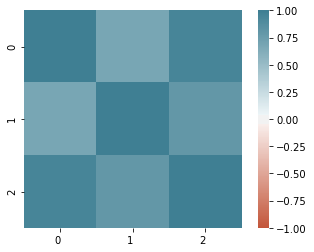

In [85]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
import seaborn  as sns
measures = [nx.pagerank(books[0]), 
            nx.closeness_centrality(books[0]), 
            nx.degree_centrality(books[0])]

# Creating the correlation DataFrame
cor1 = pd.DataFrame.from_records(measures)

# Calculating the correlation
corr1=cor1.T.corr()
print(corr1)
ax = sns.heatmap(
    corr1, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=256),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=360,
    horizontalalignment='right'
);

# Q2. Comment l'importance des PERSONNAGES a évolué progressivement

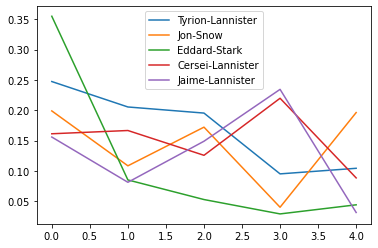

In [70]:
%matplotlib inline

# Creating a list of closeness centrality of all the books
evolution = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evolution)

# Plotting the closeness centrality evolution
degree_evol_df[[ 'Tyrion-Lannister', 'Jon-Snow','Eddard-Stark','Cersei-Lannister','Jaime-Lannister']].plot()

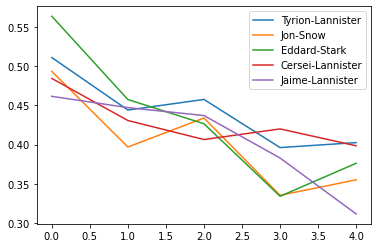

In [69]:
%matplotlib inline

# Creating a list of closeness centrality of all the books
evolution = [nx.closeness_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evolution)

# Plotting the closeness centrality evolution
degree_evol_df[[ 'Tyrion-Lannister', 'Jon-Snow','Eddard-Stark','Cersei-Lannister','Jaime-Lannister']].plot()

# Page Rank is Heart of Google Web Search

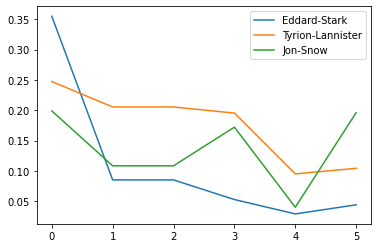

In [27]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

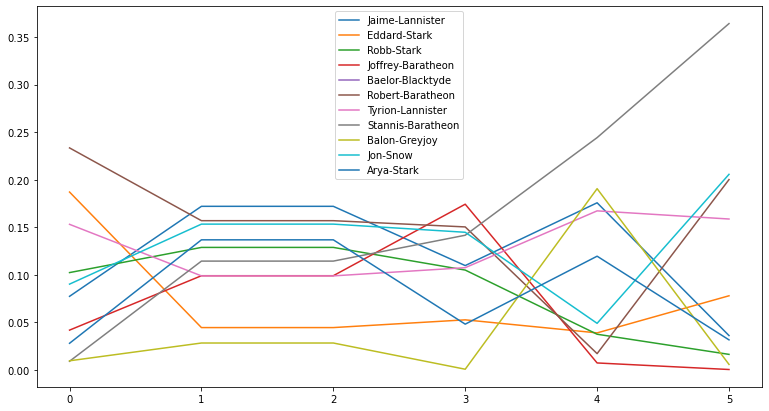

In [28]:

evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))